In [14]:
from fastkml import kml
import datetime
import pandas as pd
import haversine
import copy

import matplotlib.pyplot as plt
from lxml import etree

In [35]:
# Test code to work with KML

k = kml.KML()

kml_file = open('data/grossglockner.kml', 'rt')
doc = kml_file.read()
kml_file.close()
k = k.from_string(doc)
    
print(k.to_string(prettyprint=True))
    
#features = list(k.features())
#print(len(features))


#print('Load track with %d points' % len(gpx_track))

No geometries found


AttributeError: 'NoneType' object has no attribute 'to_string'

In [29]:
print(gpx_track[30])

NameError: name 'gpx_track' is not defined

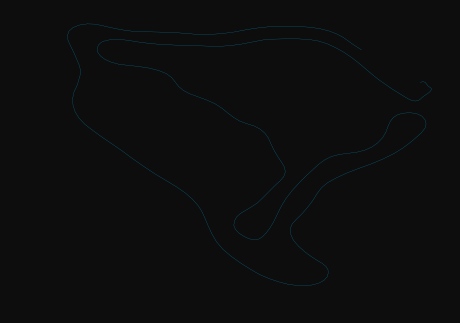

In [25]:
lat = []
lon = []

for point in truncated_track:
    lat.append(point.latitude)
    lon.append(point.longitude)
            
fig = plt.figure(facecolor = '0.05')
ax = plt.Axes(fig, [0., 0., 1., 1.], )
ax.set_aspect('equal')
ax.set_axis_off()
fig.add_axes(ax)
plt.plot(lon, lat, color = 'deepskyblue', lw = 0.2, alpha = 0.8)

In [42]:
# Removing points that corresponds to fractions of seconds, some tools cannot process them

df = pd.DataFrame(columns=['lon', 'lat', 'alt', 'time'])

truncated_track = []
for point in gpx_track:
    millis = int(point.time.strftime("%f"))
    if (millis == 0):
        truncated_track.append(point)
    
# for point in truncated_track:
#     df = df.append({'lon': point.longitude, 'lat' : point.latitude, 'alt' : point.elevation, 'time' : point.time}, ignore_index=True)    
    
# df

In [108]:
# Saving new GPX track from truncated points list

new_gpx = gpxpy.gpx.GPX()

# Create first track in our GPX:
new_gpx_track = gpxpy.gpx.GPXTrack()
new_gpx.tracks.append(new_gpx_track)

# Create first segment in our GPX track:
new_gpx_segment = gpxpy.gpx.GPXTrackSegment()
new_gpx_track.segments.append(new_gpx_segment)

# Create points:
for point in truncated_track:
    new_gpx_segment.points.append(point)

new_gpx_file = open('data/zelek/SU4_truncated.gpx', 'w+')
print(new_gpx.to_xml(), file=new_gpx_file)
new_gpx_file.close()

tree = etree.parse('data/zelek/SU4_truncated.gpx', etree.XMLParser())
root = tree.getroot()

# speed_xml = etree.XML(
#     "<root xmlns:gpxtpx=\"http://www.garmin.com/xmlschemas/TrackPointExtension/v2\"><extensions><gpxtpx:TrackPointExtension><gpxtpx:speed>6.86</gpxtpx:speed></gpxtpx:TrackPointExtension></extensions></root>"
# )
speed_xml = etree.XML(
    "<root><speed>45.86</speed></root>"
)
speed_node = speed_xml.find("speed")

course_xml = etree.XML(
    "<root><course>330.230011</course></root>"
)
course_node = course_xml.find("course")

trkseg = root.find(".//trkseg", root.nsmap)

#print(etree.tounicode(trkseg, pretty_print=True))

for point in trkseg.findall('./trkpt', root.nsmap):
    point.append(copy.deepcopy(course_node))
    point.append(copy.deepcopy(speed_node))
#    print(etree.tounicode(point, pretty_print=True))
#     trkseg.append(updated_point)
#     trkseg.remove(point)


new_gpx_file = open('data/zelek/SU4_speed_extensions.gpx', 'w+')
print(etree.tounicode(root, pretty_print=True), file=new_gpx_file)
new_gpx_file.close()